In [1]:
import pickle
import glob
import os
import sys
import time

import numpy as np
import pandas as pd 
import multiprocessing as mp 

import openmdao.api as om
from weis.aeroelasticse import FileTools

# import raft

import matplotlib.pyplot as plt

# %matplotlib


import matplotlib
# font = {
# #         'family' : 'normal',
# #         'weight' : 'bold',
#         'size'   : 14
#        }

# matplotlib.rc('font', **font)


/Users/dzalkind/opt/anaconda3/envs/weis-env4/lib/python3.8/site-packages/openmdao/utils/general_utils.py:121: OMDeprecationWarning:simple_warning is deprecated.  Use openmdao.warnings.issue_warning instead.
/Users/dzalkind/opt/anaconda3/envs/weis-env4/lib/python3.8/site-packages/openmdao/utils/notebook_utils.py:154: UserWarning:Tabulate is not installed. Run `pip install openmdao[notebooks]` to install required dependencies. Using ASCII for outputs.


In [2]:
# This function loads the openmdao sql file and does most of the work here
def load_OMsql(log):
    print('loading {}'.format(log))
    cr = om.CaseReader(log)
    rec_data = {}
    driver_cases = cr.list_cases('driver')
    cases = cr.get_cases('driver')
    for case in cases:
        for key in case.outputs.keys():
            if key not in rec_data:
                rec_data[key] = []
            rec_data[key].append(case[key])
        
    return rec_data


In [3]:
# Generated using 15_RAFT_Studies/weis_driver_umaine_semi.py
rec_data = load_OMsql('/Users/dzalkind/Projects/FloatingRM1_Controls/WEIS/outputs/56_big_gen2/log_opt.sql')

loading /Users/dzalkind/Projects/FloatingRM1_Controls/WEIS/outputs/56_big_gen2/log_opt.sql
driver
    rank0:NLopt_LN_COBYLA|0
driver
    rank0:NLopt_LN_COBYLA|1
driver
    rank0:NLopt_LN_COBYLA|2
driver
    rank0:NLopt_LN_COBYLA|3
driver
    rank0:NLopt_LN_COBYLA|4
driver
    rank0:NLopt_LN_COBYLA|5
driver
    rank0:NLopt_LN_COBYLA|6
driver
    rank0:NLopt_LN_COBYLA|7
driver
    rank0:NLopt_LN_COBYLA|8
driver
    rank0:NLopt_LN_COBYLA|9
driver
    rank0:NLopt_LN_COBYLA|10
driver
    rank0:NLopt_LN_COBYLA|11
driver
    rank0:NLopt_LN_COBYLA|12
driver
    rank0:NLopt_LN_COBYLA|13
driver
    rank0:NLopt_LN_COBYLA|14
driver
    rank0:NLopt_LN_COBYLA|15
driver
    rank0:NLopt_LN_COBYLA|16
driver
    rank0:NLopt_LN_COBYLA|17
driver
    rank0:NLopt_LN_COBYLA|18
driver
    rank0:NLopt_LN_COBYLA|19
driver
    rank0:NLopt_LN_COBYLA|20
driver
    rank0:NLopt_LN_COBYLA|21
driver
    rank0:NLopt_LN_COBYLA|22
driver
    rank0:NLopt_LN_COBYLA|23
driver
    rank0:NLopt_LN_COBYLA|24
driver
    rank0:NL

In [4]:
# Search for keys in rec_data, it has every openmdao input/output from every iteration, so it's large
for key in rec_data:
    if 'Pitch' in key:
        print(key)

aeroelastic.Max_PtfmPitch


In [5]:
# Usually, you need to squeeze the rec data
np.squeeze(rec_data['aeroelastic.Max_PtfmPitch'])
# rec_data['raft.stats_pitch_max']


array([ 2.37253356,  2.60076213,  2.09905386,  2.62404656,  1.57603383,
       10.32336426,  4.20552778,  5.54564428,  4.8645668 ,  3.48914456,
       15.        ,  6.38174248, 17.60901833,  6.14408588, 16.10853386,
        7.7176981 ,  7.7766614 , 15.52531719,  6.09488869,  6.20003939,
        6.09335089,  6.22011566,  6.01305723,  5.96177292,  6.06333303,
        5.5488987 ,  5.57966709,  5.55168533,  5.51863527,  5.51385689,
        5.50052643,  5.55580473,  5.5168829 ,  5.55162764,  5.5146203 ,
        5.52002954,  5.50697136,  5.59718513,  5.50868797,  5.57172632,
        5.50854158,  5.56950283,  5.51431608,  5.65381622,  5.51432323,
        5.51317835,  5.51021147,  5.51633024,  5.51163483,  5.51397324,
        5.51405573])

Text(0.5, 0, 'Iteration')

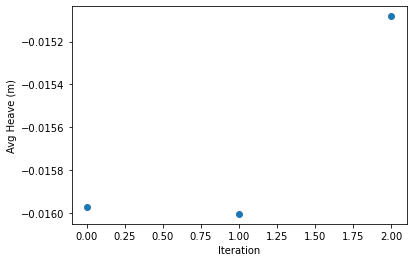

In [6]:
plt.scatter(np.arange(len(np.squeeze(rec_data['raft.heave_avg']))),np.squeeze(rec_data['raft.heave_avg']))
plt.ylabel('Avg Heave (m)')
plt.xlabel('Iteration')

In [7]:
# Not used much, but it's here
def plot_doe(x_vars,y_vars,rec_data=rec_data):
    fig, axs = plt.subplots(len(x_vars),len(y_vars))
    axs = axs.flatten()

    sp_size = 4

    fig.set_size_inches(sp_size*len(y_vars), sp_size*len(x_vars) )

    i_ax = 0
    for xv in x_vars:
        for yv in y_vars:
            x_data = np.squeeze(rec_data[xv])
            y_data = np.squeeze(rec_data[yv])

            axs[i_ax].scatter(x_data,y_data)
            axs[i_ax].set_xlabel(xv)
            axs[i_ax].set_ylabel(yv)
            axs[i_ax].grid()
            i_ax += 1

    fig.tight_layout(pad=0.25)
    
    return fig, axs

# Plot design variables, constraints, and merit figures (openmdao inputs/outputs) vs. iteration

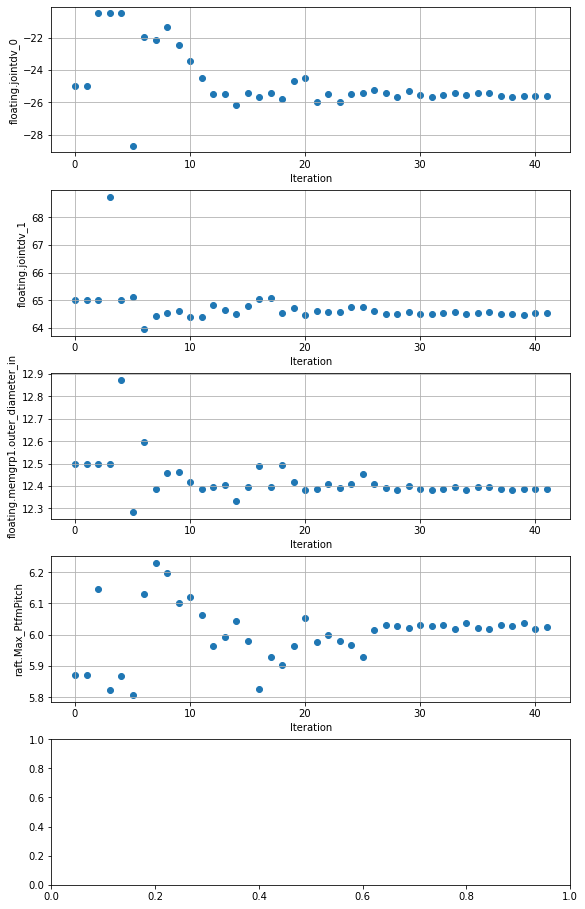

In [5]:
# rec_data = rec_dataC

y_vars = [  
    'floating.jointdv_0',
          'floating.jointdv_1',
          'floating.memgrp1.outer_diameter_in',
          # 'floating.memgrp5.outer_diameter_in',
#           'floatingse.platform_mass',
          'raft.platform_mass',
          # 'financese.lcoe',
          'raft.Max_PtfmPitch',
#           'raft.Max_Offset',
#           'raft.Std_PtfmPitch',
#           'raft.max_nacelle_Ax',
#           'raft.rotor_overspeed',
#           'max_stress',
#           'max_sh_buck',
#           'max_gl_buck',    
#           'floating.jointdv_1',
         
         ]

# rec_data['meanD'] = np.mean(np.squeeze(rec_data['floating.memgrp1.outer_diameter_in']),axis=1)
# rec_data['meanP'] = np.mean(np.squeeze(rec_data['floating.memgrp5.outer_diameter_in']),axis=1)
# rec_data['max_stress'] = np.max(np.squeeze(np.array(rec_data['floatingse.constr_platform_stress'])),axis=1)
# rec_data['max_sh_buck'] = np.max(np.squeeze(np.array(rec_data['floatingse.constr_platform_shell_buckling'])),axis=1)
# rec_data['max_gl_buck'] = np.max(np.squeeze(np.array(rec_data['floatingse.constr_platform_global_buckling'])),axis=1)

fig, axs = plt.subplots(len(y_vars),1)
axs = axs.flatten()

sp_size = 2.5

fig.set_size_inches(8, len(y_vars)*sp_size)

i_ax = 0
for yv in y_vars:
    try:
        y_data = np.squeeze(rec_data[yv])

        axs[i_ax].scatter(np.arange(len(y_data)),y_data)
        axs[i_ax].set_xlabel('Iteration')
        axs[i_ax].set_ylabel(yv)
        axs[i_ax].grid()
        i_ax += 1
    except:
        pass

fig.tight_layout(pad=0.25)

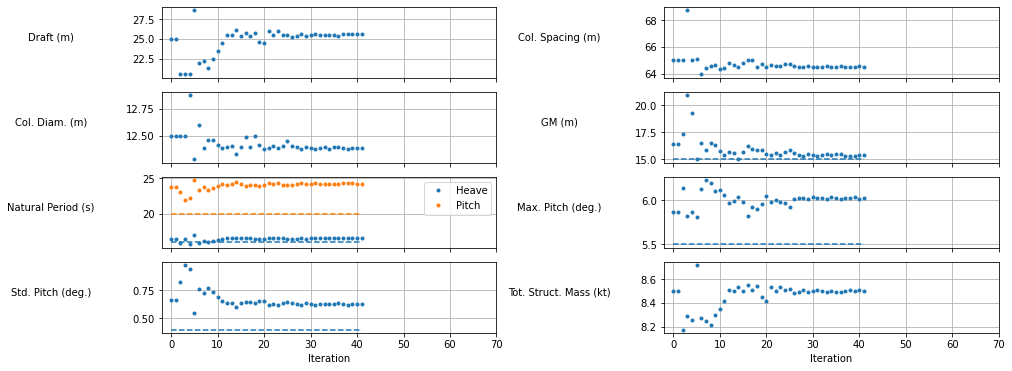

In [6]:
iterations = np.arange(len(rec_data['floating.jointdv_0']))

fig, axs = plt.subplots(4,2,sharex=True)

axs = axs.flatten()

r = 0
lp = 75

axs[0].plot(iterations,-np.squeeze(rec_data['floating.jointdv_0']),'.')
axs[0].set_ylabel('Draft (m)',rotation=r,labelpad=lp)

axs[1].plot(iterations,np.squeeze(rec_data['floating.jointdv_1']),'.')
axs[1].set_ylabel('Col. Spacing (m)',rotation=r,labelpad=lp)


axs[2].plot(iterations,np.squeeze(rec_data['floating.memgrp1.outer_diameter_in']),'.')
axs[2].set_ylabel('Col. Diam. (m)',rotation=r,labelpad=lp)

axs[3].plot(iterations,np.squeeze(rec_data['floatingse.metacentric_height']),'.')
axs[3].set_ylabel('GM (m)',rotation=r,labelpad=lp)
axs[3].hlines(15,iterations[0],iterations[-1],linestyle='--')


axs[4].plot(iterations,np.squeeze(rec_data['raft.heave_period']),'.',label='Heave')
axs[4].hlines(16,iterations[0],iterations[-1],linestyle='--')
axs[4].plot(iterations,np.squeeze(rec_data['raft.pitch_period']),'.',label='Pitch')
plot1_color = axs[4].lines[1].get_color()
axs[4].hlines(20,iterations[0],iterations[-1],linestyle='--',color=plot1_color)
axs[4].set_ylabel('Natural Period (s)',rotation=r,labelpad=lp)
axs[4].legend()


axs[5].plot(iterations,np.squeeze(rec_data['raft.Max_PtfmPitch']),'.')
axs[5].set_ylabel('Max. Pitch (deg.)',rotation=r,labelpad=lp)
axs[5].hlines(5.5,iterations[0],iterations[-1],linestyle='--')

axs[6].plot(iterations,np.squeeze(rec_data['raft.Std_PtfmPitch']),'.')
axs[6].set_ylabel('Std. Pitch (deg.)',rotation=r,labelpad=lp)
axs[6].hlines(0.4,iterations[0],iterations[-1],linestyle='--')

axs[7].plot(iterations,1e-6*np.squeeze(rec_data['floatingse.system_structural_mass']),'.')
axs[7].set_ylabel('Tot. Struct. Mass (kt)',rotation=r,labelpad=lp)

fig.align_ylabels()

[a.grid() for a in axs]

[a.set_xlim(right=70) for a in axs]

axs[6].set_xlabel('Iteration')
axs[7].set_xlabel('Iteration')

# axs[5].plot

# raft.

fig.set_size_inches(15,6)
plt.subplots_adjust(wspace=0.5)

An old set of commands for plotting control optimizations

In [9]:

# fig, axs = plt.subplots(5,1)

# fig.set_size_inches(12,10)

# iterations = np.arange(len(rec_data['aeroelastic.DEL_TwrBsMyt']))


# axs[0].plot(iterations,np.array(rec_data['aeroelastic.DEL_TwrBsMyt'])/1e3)
# axs[1].plot(iterations,np.array(rec_data['aeroelastic.rotor_overspeed'])*100)
# axs[1].plot([0,iterations.max()],[27.5,27.5],'k--')

# axs[2].plot(iterations,rec_data['tune_rosco_ivc.omega_pc'])
# axs[3].plot(iterations,rec_data['tune_rosco_ivc.zeta_pc'])


# axs[4].plot(iterations,rec_data['tune_rosco_ivc.Kp_float'])


# [a.set_xticklabels('') for a in axs[:-1]]
# [a.grid() for a in axs]

# axs[0].set_ylabel('Twr. Bs. DEL\n(MNm)')
# axs[1].set_ylabel('Overspeed\n(%)')
# axs[2].set_ylabel('$\omega_{pc}$\n(rad/s)')
# axs[3].set_ylabel('$\zeta_{pc}$\n(rad/s)')
# axs[4].set_ylabel('$k_{float}$\n(s)')

# axs[2].legend(['12 m/s','18 m/s'])

# axs[4].set_xlabel('Iteration')

# fig.align_ylabels()

# axs[0].plot()

